In [2]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn



In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2023-12-11 19:27:59.313939: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras import layers

In [6]:
from tensorflow.keras import layers

In [7]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


## Data load and check

In [9]:
data = pd.read_csv('creditcard.csv')

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [12]:
print(data.shape)

(284807, 31)


In [13]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [14]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

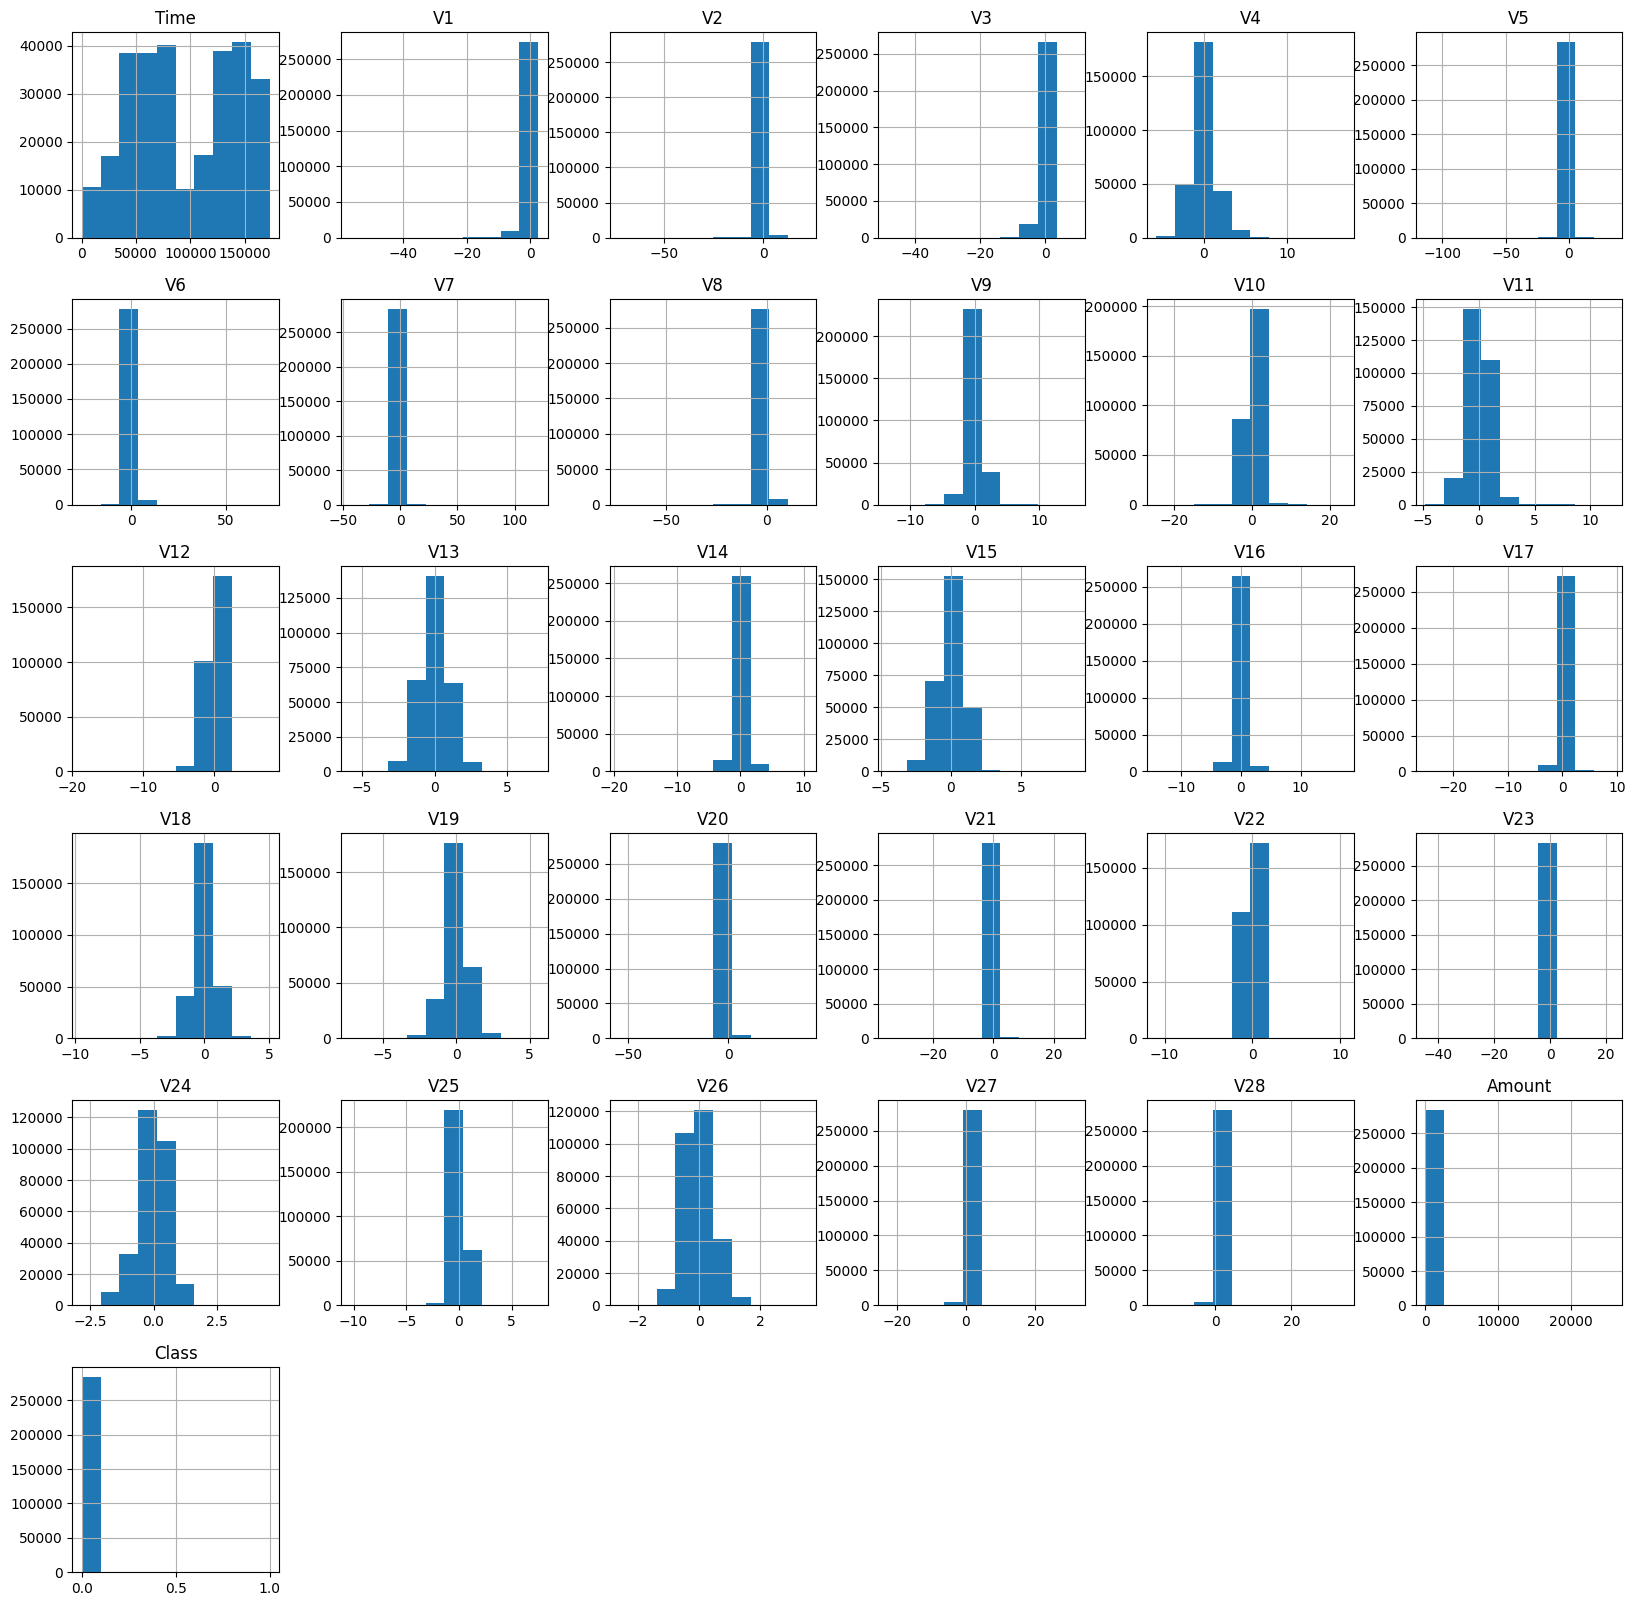

In [15]:
data.hist(figsize = (20,20))
plt.show

## Pre-process

In [16]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#detect number of fraud
Fraud = data[data['Class']==1]
Legit = data[data['Class'] ==0]

outlier_fraction = len(Fraud)/float(len(Legit))
print('Fraud transaction are ',round(outlier_fraction*100,4), '% of the Total transactions')
print()

Fraud transaction are  0.173 % of the Total transactions



In [18]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
Legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

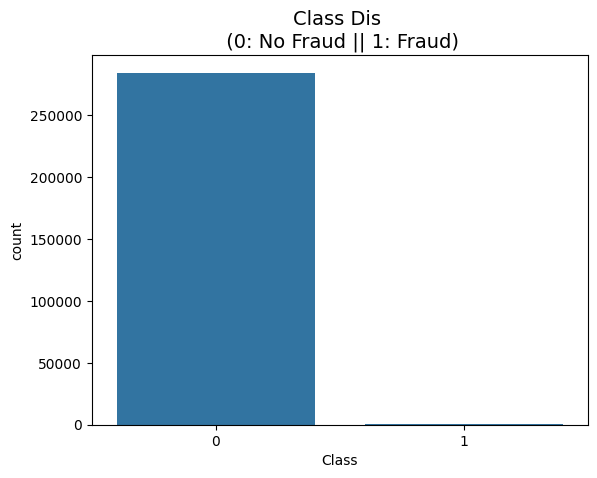

In [20]:
#Visualize Legit vs fraud transactions
sns.countplot(x='Class', data=data)
plt.title('Class Dis \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

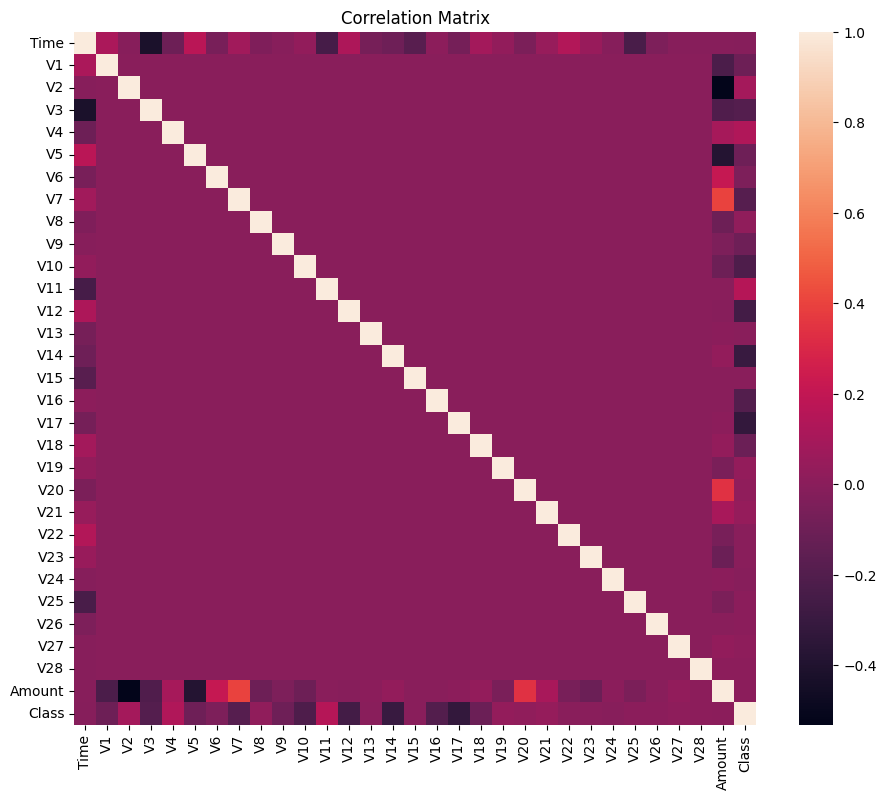

In [21]:
# Plot the correlation Matrix
corr_data = data.corr()
plt.figure(figsize=(11,9))
matrix = sns.heatmap(data=corr_data)
plt.title("Correlation Matrix")
plt.show()

In [22]:
print(Legit.shape)
print(Fraud.shape)

(284315, 31)
(492, 31)


In [23]:
Legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [24]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Dealing Imbalance data 

In [25]:
## dealing with the imbalance in the data
# taking a sample of the legit transactions 
Legit_Sample = Legit.sample(n=492)

In [26]:
Adjusted_data = pd.concat([Legit_Sample,Fraud], axis=0)

In [27]:
Adjusted_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
253282,156175.0,0.202257,1.460193,-2.295780,0.715586,1.562619,-0.469588,1.358664,0.098162,-1.257875,...,0.592268,1.891258,-0.029862,0.290079,-1.024255,-0.382664,0.472072,0.338770,27.20,0
93766,64577.0,-1.232977,0.419643,1.886947,-1.679414,0.573195,-0.663300,0.914147,0.079024,-0.848627,...,-0.030457,-0.378054,-0.037495,0.257351,0.247459,0.567365,-0.106999,0.036420,49.95,0
101273,67778.0,-0.442238,0.865191,1.408042,-0.206812,-0.011592,-0.407281,0.521444,0.183740,-0.409675,...,-0.211223,-0.665004,-0.041356,-0.057722,-0.228343,0.078851,0.249017,0.104708,9.83,0
247960,153745.0,2.082234,-1.412540,0.218813,-0.689080,-1.630660,0.375501,-1.780179,0.345022,0.913408,...,0.155186,0.688809,0.185401,-0.393894,-0.349600,-0.182235,0.052205,-0.052522,7.10,0
194180,130470.0,-0.309671,-0.822777,0.207125,-0.119850,0.836958,0.441474,-0.286577,0.452867,0.908669,...,0.650163,1.784789,0.694432,-1.057291,-2.305999,-0.428021,0.423313,0.387986,92.49,0


In [28]:
Adjusted_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
253282,156175.0,0.202257,1.460193,-2.295780,0.715586,1.562619,-0.469588,1.358664,0.098162,-1.257875,...,0.592268,1.891258,-0.029862,0.290079,-1.024255,-0.382664,0.472072,0.338770,27.20,0
93766,64577.0,-1.232977,0.419643,1.886947,-1.679414,0.573195,-0.663300,0.914147,0.079024,-0.848627,...,-0.030457,-0.378054,-0.037495,0.257351,0.247459,0.567365,-0.106999,0.036420,49.95,0
101273,67778.0,-0.442238,0.865191,1.408042,-0.206812,-0.011592,-0.407281,0.521444,0.183740,-0.409675,...,-0.211223,-0.665004,-0.041356,-0.057722,-0.228343,0.078851,0.249017,0.104708,9.83,0
247960,153745.0,2.082234,-1.412540,0.218813,-0.689080,-1.630660,0.375501,-1.780179,0.345022,0.913408,...,0.155186,0.688809,0.185401,-0.393894,-0.349600,-0.182235,0.052205,-0.052522,7.10,0
194180,130470.0,-0.309671,-0.822777,0.207125,-0.119850,0.836958,0.441474,-0.286577,0.452867,0.908669,...,0.650163,1.784789,0.694432,-1.057291,-2.305999,-0.428021,0.423313,0.387986,92.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


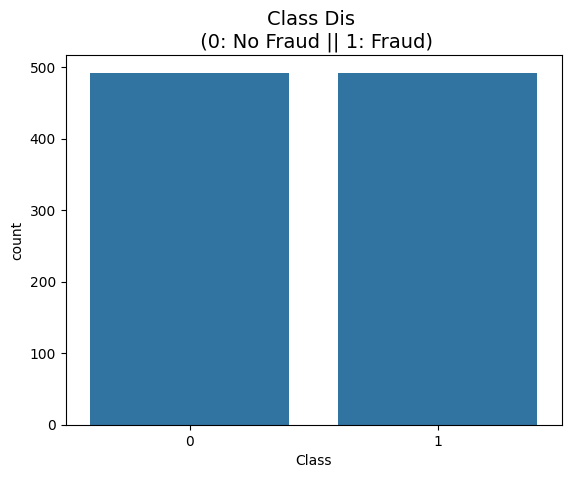

In [29]:
#Visualize adgusted Legit vs fraud transactions
sns.countplot(x='Class', data=Adjusted_data)
plt.title('Class Dis \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

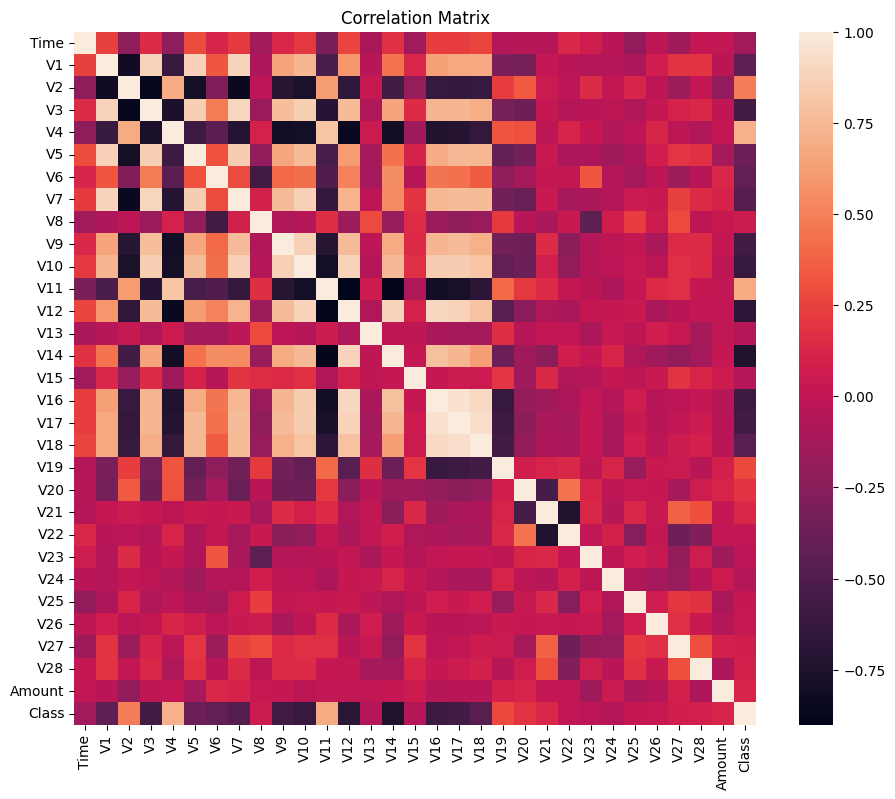

In [30]:
# Plot the correlation Matrix
corr_Adjusted_data = Adjusted_data.corr()
plt.figure(figsize=(11,9))
matrix = sns.heatmap(data=corr_Adjusted_data)
plt.title("Correlation Matrix")
plt.show()

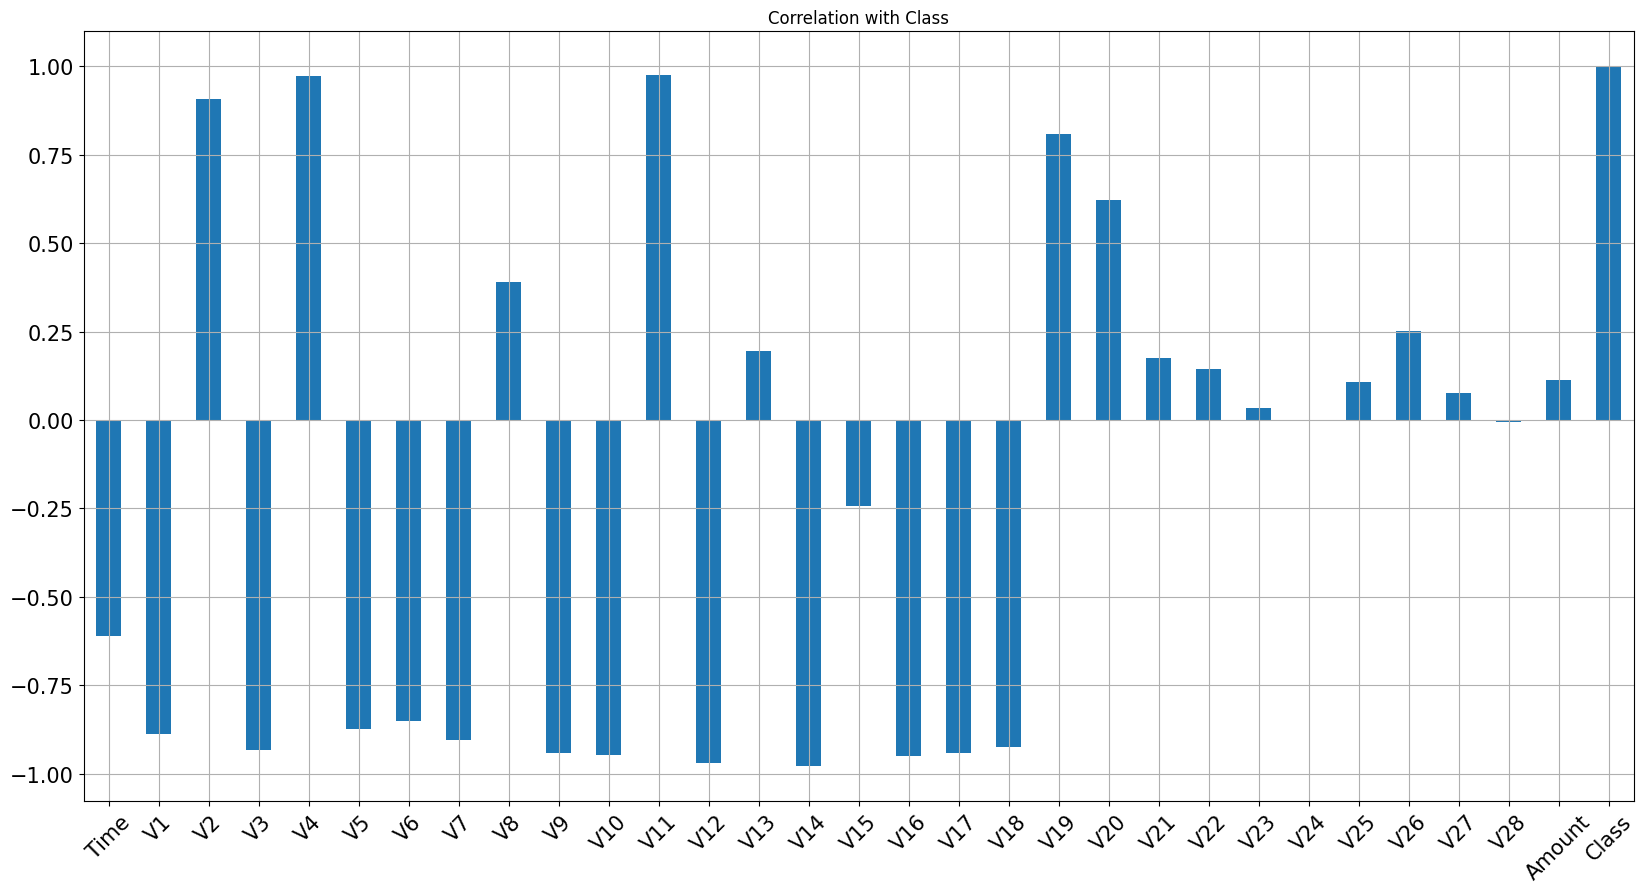

In [31]:
corr_Adjusted_data.corrwith(corr_Adjusted_data.Class).plot.bar(figsize = (20, 10), title = "Correlation with Class", fontsize = 15, rot = 45, grid = True)
plt.show()

In [32]:
Fraud = data[data['Class']==1]
Adjusted_Legit = Adjusted_data[data['Class'] ==0]

print(Adjusted_Legit.shape)
print(Fraud.shape)

(492, 31)
(492, 31)


/var/folders/yd/tv0jzz6s7j94k8pkvtcbqtcw0000gn/T/ipykernel_6767/3755404227.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Adjusted_Legit = Adjusted_data[data['Class'] ==0]


In [33]:
# Remove extreme outliers
Q1 = Adjusted_data.quantile(0.25)
Q3 = Adjusted_data.quantile(0.75)
IQR = Q3 - Q1
data2 = Adjusted_data[~((Adjusted_data < (Q1 - 3 * IQR)) |(Adjusted_data > (Q3 + 3 * IQR))).any(axis=1)]
data_after = len(data2)
data_before = len(Adjusted_data)
len_difference = len(Adjusted_data) - len(data2)
print("Data reduced " +str(data_before)+" transactions by " +str(len_difference)+" transactions to "+str(data_after)+" transactions.")
print("Now  " + str(data2.Class.value_counts()[0]) + " legit transactions")
print("now " + str(data2.Class.value_counts()[1]) + " fraud transactions")

data2.to_csv('data2.csv')

Data reduced 984 transactions by 238 transactions to 746 transactions.
Now  452 legit transactions
now 294 fraud transactions


## Train

In [34]:
X= Adjusted_data.drop('Class', axis=1)
Y = Adjusted_data['Class']
print(X.shape)
print(Y.shape)

(984, 30)
(984,)


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [36]:
print(X_train.shape, X_test.shape)

(787, 30) (197, 30)


In [37]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
100623,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,-0.032500,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,549.06
33174,37118.0,1.148413,-0.067240,1.274269,1.348574,-1.020208,-0.209187,-0.585242,0.113948,0.953643,...,-0.156048,-0.065834,-0.008112,-0.001093,0.384855,0.400217,-0.408113,0.069379,0.037831,11.50
41260,40613.0,-0.962289,0.726610,0.512152,0.309373,0.276624,-0.272852,0.569241,0.418073,-1.259428,...,0.240098,-0.189909,-1.015085,0.080067,-0.523961,-0.146687,0.292450,-0.106610,-0.023949,79.95
275627,166641.0,-0.237941,1.196432,-0.023164,-0.490029,1.412965,-0.240747,1.181161,-0.118846,-0.682934,...,0.067477,-0.320150,-0.895969,-0.405145,-0.045325,0.802211,0.547203,-0.118105,-0.052268,5.73
54761,46603.0,0.563356,-1.710115,0.469399,-1.089185,-1.673490,-0.482409,-0.349247,0.030353,1.723690,...,0.595858,0.367376,0.482791,-0.414252,0.419737,0.311439,0.061683,-0.026925,0.072043,348.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64535,51187.0,-1.995926,-2.241909,1.300087,0.226060,-1.972335,0.690331,-1.094757,0.786946,-0.133235,...,-0.066316,0.342501,1.009970,-0.230450,0.308397,-1.140188,-0.146081,0.425472,-0.358104,300.00
191857,129430.0,-4.026780,-4.346851,-0.501967,0.110850,1.658166,-2.090272,-0.253426,0.097667,-0.837031,...,-0.725472,-0.086490,1.147356,2.685646,-0.030888,0.212567,0.004453,0.508061,-0.379859,172.00
223618,143456.0,-2.006582,3.676577,-5.463811,7.232058,-1.627859,-0.996755,-4.299833,2.268867,-3.651067,...,0.474414,0.713907,-0.063868,0.167947,-0.449864,0.023702,0.536905,0.485864,-0.042393,1.00
43061,41353.0,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,...,-0.995787,2.525115,-0.832074,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,34.12


In [38]:
# due to the variance in scaling between columns, stanarizing the data, scale x_test based x_train
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# convert Y labels into numpy array
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [40]:
X_train.shape

(787, 30)

In [41]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

X_train.shape, X_test.shape


((787, 30, 1), (197, 30, 1))

### buiding model

In [42]:

def build_model():
    input_layer = keras.Input(shape=X_train[0].shape)
    
    # Convolutional layers
    x = Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape)(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Conv1D(64, 2, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Flatten and Dense layers
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=input_layer, outputs=outputs)
    
    # Build the model
    model.build(input_shape=(None, X_train[0].shape))
    
    return model




In [44]:
model = build_model()

In [45]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                            

In [46]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 16ms/step - loss: 0.0858 - accuracy: 0.9606 - val_loss: 0.2517 - val_accuracy: 0.9137
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0822 - accuracy: 0.9759 - val_loss: 0.2653 - val_accuracy: 0.9137
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0961 - accuracy: 0.9606 - val_loss: 0.2405 - val_accuracy: 0.9086
Epoch 4/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0924 - accuracy: 0.9644 - val_loss: 0.2620 - val_accuracy: 0.9086
Epoch 5/20
25/25 [==============================] - 0s 14ms/step - loss: 0.0868 - accuracy: 0.9644 - val_loss: 0.2665 - val_accuracy: 0.9086
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0850 - accuracy: 0.9644 - val_loss: 0.2663 - val_accuracy: 0.9086
Epoch 7/20
25/25 [==============================] - 0s 14ms/step - loss: 0.0822 - accuracy: 0.9682 - val_loss: 0.2649 - val_accuracy: 0.9188
Epoch 8/20
25/2

In [51]:
def plot_learnedCurve(history, epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()


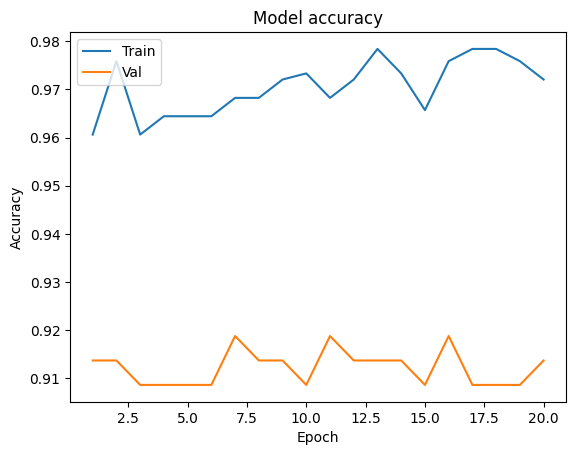

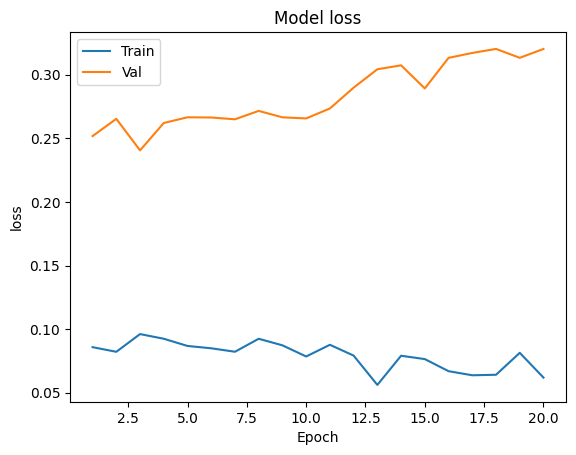

In [55]:
plot_learnedCurve(history, epoch=20)

### Prediction

In [56]:

model.save('fraud_detection_model.h5')


/Users/noori/anaconda3/envs/ece5831-2023/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
from tensorflow.keras.models import load_model

model = load_model('fraud_detection_model.h5')


In [62]:
# Reshape the test data before preprocessing
X_test = X_test.reshape(X_test.shape[0], -1)

X_test = scaler.transform(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)




/Users/noori/anaconda3/envs/ece5831-2023/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
predictions = model.predict(X_test)


7/7 [==============================] - 0s 3ms/step


In [64]:
binary_predictions = (predictions > 0.5).astype(int)


In [65]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, binary_predictions))


              precision    recall  f1-score   support

           0       0.52      0.99      0.68        99
           1       0.86      0.06      0.11        98

    accuracy                           0.53       197
   macro avg       0.69      0.53      0.40       197
weighted avg       0.69      0.53      0.40       197

